In [1]:
import networkx as nx
import osmnx as ox
from IPython.display import IFrame
import geopandas as gdp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from shapely import wkt
ox.config(use_cache=True, log_console=True)
%matplotlib inline
ox.__version__

c:\ProgramData\Miniconda3\envs\ox\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


'1.2.2'

In [2]:
place = "Trier, Germany"
G = ox.graph_from_place(place, network_type="drive")

In [3]:
# impute speed on all edges missing data
G = ox.add_edge_speeds(G)

# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)


In [4]:
## 1. convert the graph to geodataframe 
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [5]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 2737,
 'm': 6231,
 'k_avg': 4.55316039459262,
 'edge_length_total': 763533.6570000027,
 'edge_length_avg': 122.53790033702498,
 'streets_per_node_avg': 2.701132626963829,
 'streets_per_node_counts': {0: 0, 1: 520, 2: 61, 3: 1888, 4: 256, 5: 9, 6: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.18998903909389842,
  2: 0.02228717573986116,
  3: 0.689806357325539,
  4: 0.09353306540007307,
  5: 0.003288271830471319,
  6: 0.0010960906101571063},
 'intersection_count': 2217,
 'street_length_total': 427981.4179999994,
 'street_segment_count': 3699,
 'street_length_avg': 115.70192430386575,
 'circuity_avg': 1.0816266545095323,
 'self_loop_proportion': 0.010813733441470668,
 'clean_intersection_count': 1507,
 'node_density_km': 25.142187800766045,
 'intersection_density_km': 20.36544769978017,
 'edge_density_km': 7013.849688162131,
 'street_density_km': 3931.4538496872997,
 'clean_intersection_density_km': 13.843360254203299}

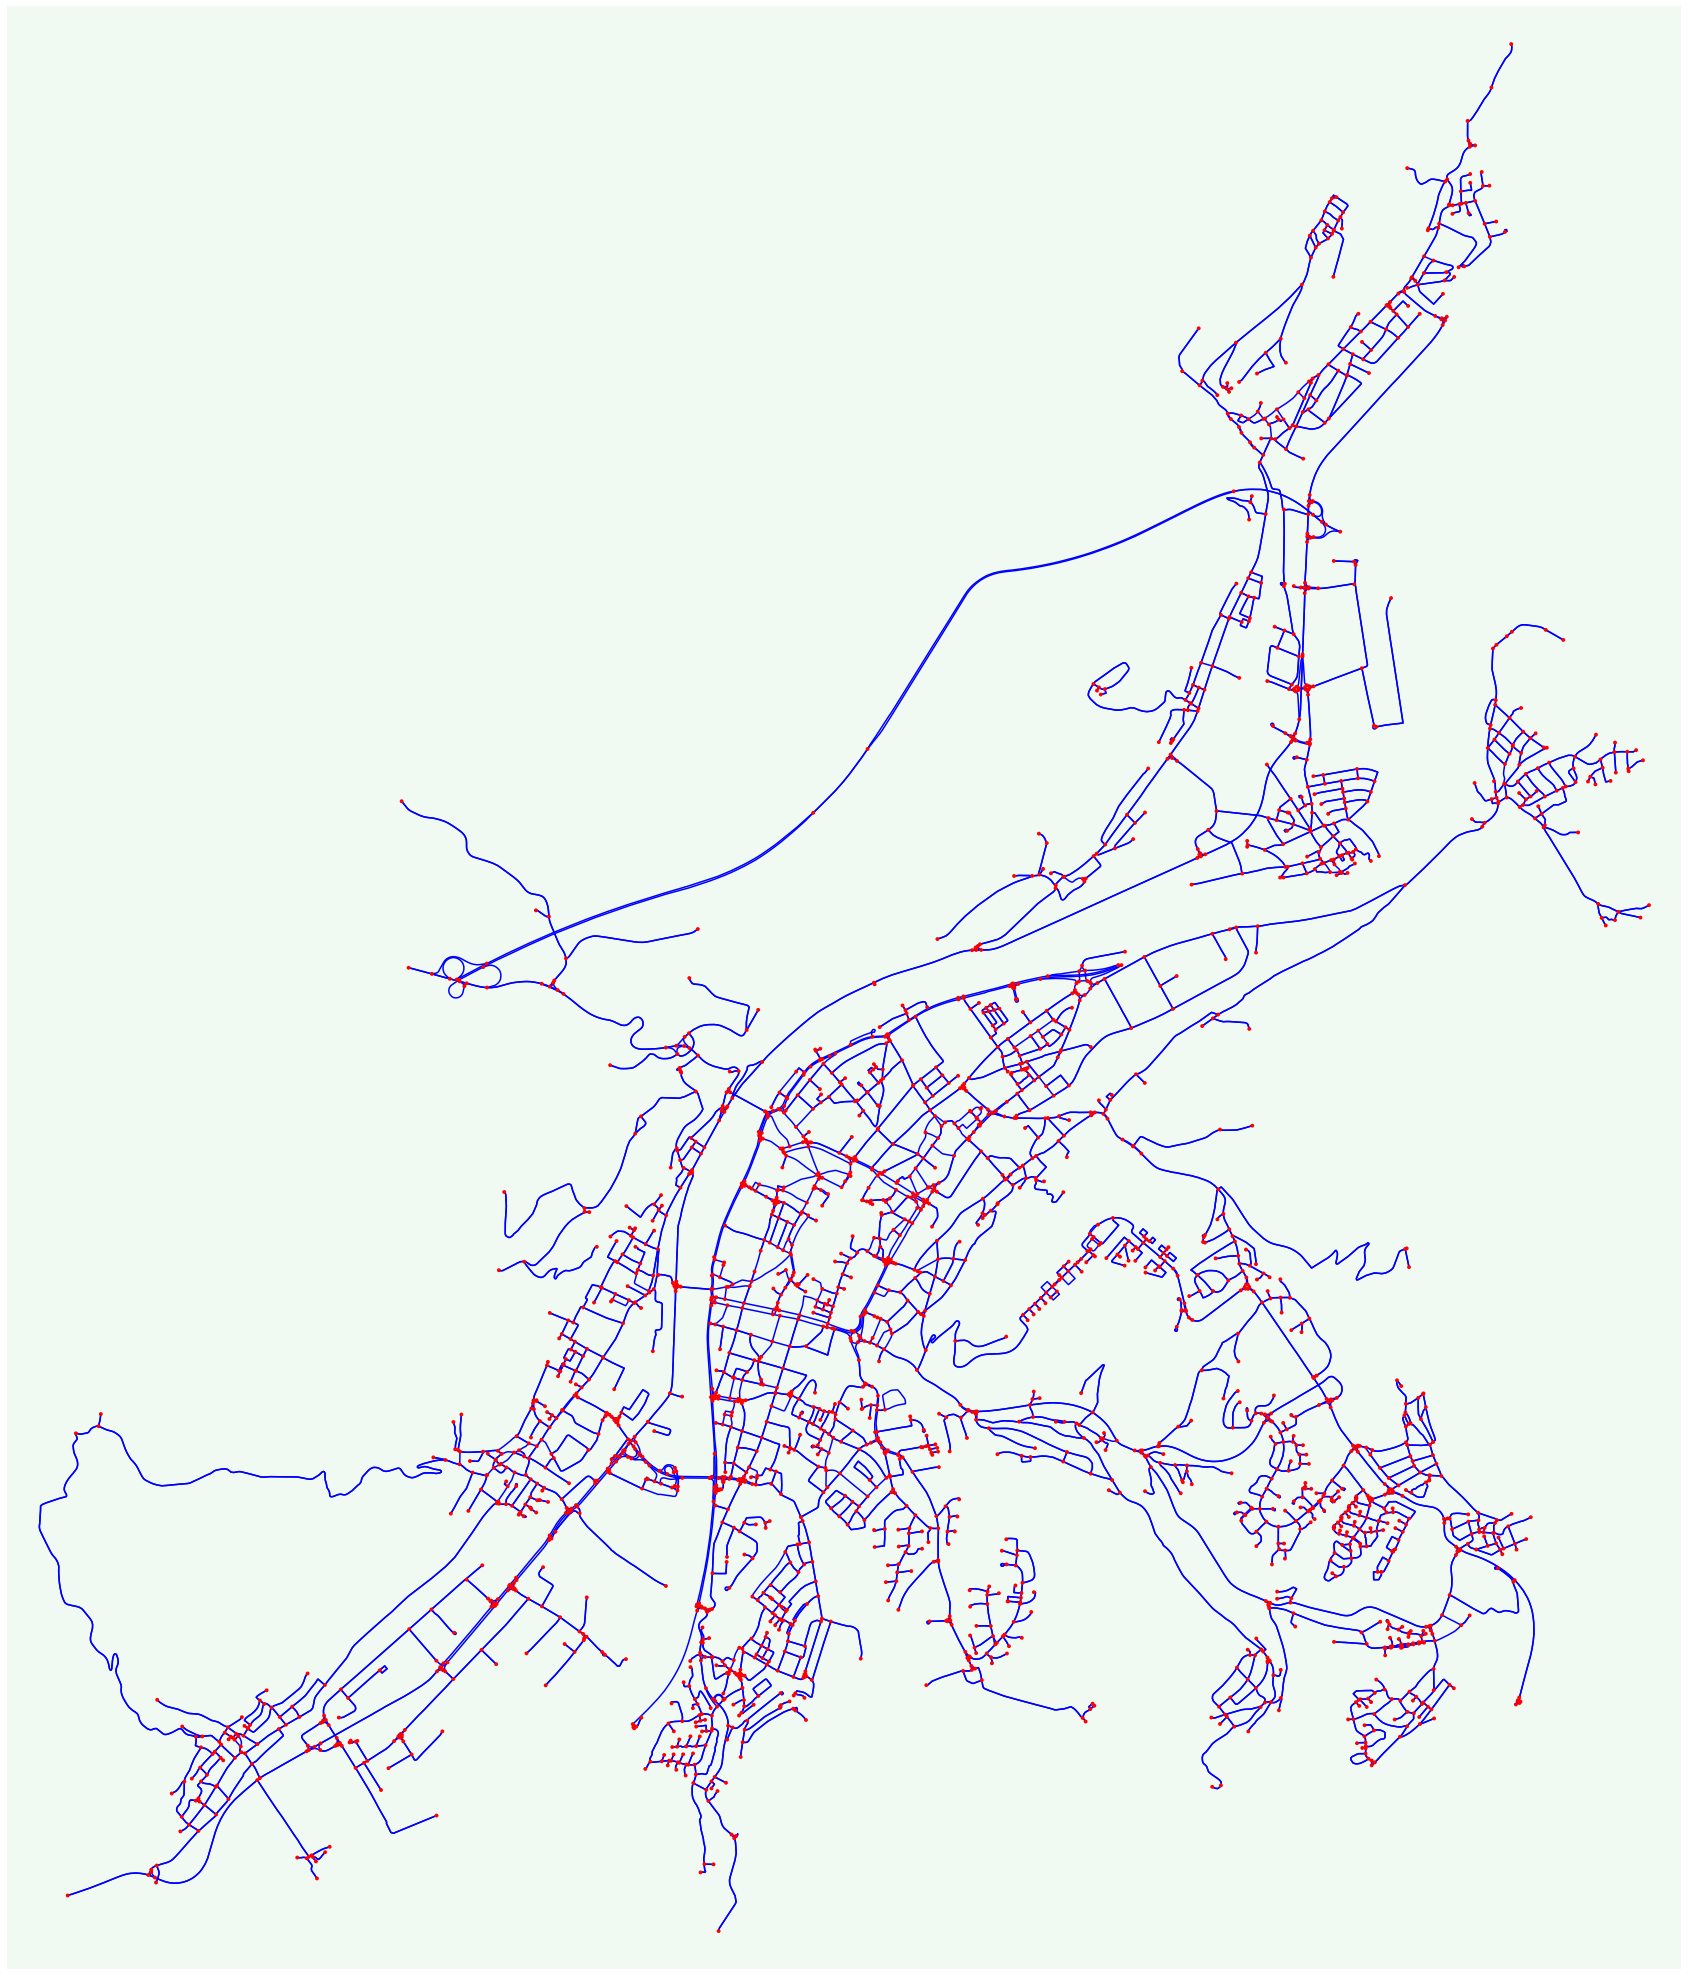

In [6]:

fig, ax = ox.plot_graph(G, figsize=(30, 50), bgcolor="#f0faf3", node_size=15, edge_color="b",node_color='r', edge_linewidth=1.5)


In [7]:
gdf_nodes.head(5)

y         x  street_count highway  ref  \
osmid                                                      
10602396  49.750094  6.637228             4     NaN  NaN   
10602410  49.749518  6.640148             4     NaN  NaN   
10602412  49.753874  6.642488             3     NaN  NaN   
10602431  49.754348  6.644230             3     NaN  NaN   
10602432  49.753833  6.645809             3     NaN  NaN   

                          geometry  
osmid                               
10602396  POINT (6.63723 49.75009)  
10602410  POINT (6.64015 49.74952)  
10602412  POINT (6.64249 49.75387)  
10602431  POINT (6.64423 49.75435)  
10602432  POINT (6.64581 49.75383)

In [8]:
gdf_edges.head(5)

osmid  oneway lanes  \
u        v          key                                        
10602396 268656889  0     [620480498, 6073765]    True     1   
         3328610208 0                 44503497    True   NaN   
         20909583   0                113363975    True     1   
10602410 3212415597 0                  6073363   False   NaN   
         10602396   0    [348744826, 44181036]    True     3   

                                              name  \
u        v          key                              
10602396 268656889  0    [Germanstraße, Neustraße]   
         3328610208 0                 Kaiserstraße   
         20909583   0                          NaN   
10602410 3212415597 0                          NaN   
         10602396   0                 Kaiserstraße   

                                              highway reversed   length  \
u        v          key                                                   
10602396 268656889  0    [residential, living_street]    False  249.956   
         3328610208 0                       secondary    False  153.907   
         20909583   0                  secondary_link    False   36.470   
10602410 3212415597 0                     residential    False   28.040   
         10602396   0                       secondary    False  219.652   

                        maxspeed  \
u        v          key            
10602396 268656889  0         50   
         3328610208 0         50   
         20909583   0         50   
10602410 3212415597 0        NaN   
         10602396   0         50   

                                                                  geometry  \
u        v          key                                                      
10602396 268656889  0    LINESTRING (6.63723 49.75009, 6.63724 49.75015...   
         3328610208 0    LINESTRING (6.63723 49.75009, 6.63711 49.75012...   
         20909583   0    LINESTRING (6.63723 49.75009, 6.63717 49.75006...   
10602410 3212415597 0    LINESTRING (6.64015 49.74952, 6.64008 49.74938...   
         10602396   0    LINESTRING (6.64015 49.74952, 6.64005 49.74955...   

                         speed_kph  travel_time    ref width bridge junction  \
u        v          key                                                        
10602396 268656889  0         50.0         18.0    NaN   NaN    NaN      NaN   
         3328610208 0         50.0         11.1  L 143   NaN    NaN      NaN   
         20909583   0         50.0          2.6    NaN   NaN    NaN      NaN   
10602410 3212415597 0         33.8          3.0    NaN   NaN    NaN      NaN   
         10602396   0         50.0         15.8  L 143   NaN    NaN      NaN   

                        access tunnel  
u        v          key                
10602396 268656889  0      NaN    NaN  
         3328610208 0      NaN    NaN  
         20909583   0      NaN    NaN  
10602410 3212415597 0      NaN    NaN  
         10602396   0      NaN    NaN

In [9]:
def shortest_path(origin, destination, G):
    x_orig = origin['lon']
    y_origin = origin['lat']
    x_dest = destination['lon']
    y_dest = destination['lat']
    orig = ox.distance.nearest_nodes(G, X = x_orig, Y = y_origin) # saarstraße
    dest = ox.distance.nearest_nodes(G, X = x_dest, Y = y_dest) # germanstraße, gervasiusstraße
    route = ox.shortest_path(G, orig, dest, weight = "travel_time")
    #m = ox.plot_route_folium(G, route, weight=10)
    #filepath = r'C:\Users\looka\OneDrive\Desktop\RCS\shortest_1.html'
    #m.save(filepath)
    #IFrame(filepath, width=600, height = 500)
    return route

In [10]:
# getting the nodes of non degreded shortest route
def get_nodes(short_route):
    node_df = gdp.GeoDataFrame()
    for i in short_route:
        node_df = node_df.append((gdf_nodes.loc[[i]]))
    return node_df

In [11]:
def get_edges(short_route):
    edge_df = gdp.GeoDataFrame()
    for i in short_route:
        edge_df = edge_df.append(gdf_edges.loc[(i, slice(None), slice(None)),:])
    return edge_df

In [13]:
# simplify the dataset
def simplify_dataset(edges, short_route):       
    new_df = gdp.GeoDataFrame(data=None, index=None, columns=['u', 'v','osmid', 'oneway', 'lanes', 'name', 'highway', 'reversed', 'length',
            'maxspeed', 'geometry'])
    c = 0
    new_route = short_route[0:]
    new_orig = short_route[0]

    for i in new_route:
      
        for index, j in edges.iterrows():
                if index[0] == new_orig and index[1] == i:
                    src = index[0]
                    dest = index[1]
                    osmid = j['osmid']
                    one_way = j['oneway']
                    lanes = j['lanes']
                    name = j['name']
                    highway = j['highway']
                    reveresed = j['reversed']
                    length = j['length']
                    max_speed = j['maxspeed'] 
                    geometry = j['geometry']
                    new_df = new_df.append({'u' : src, 'v' : dest, 'osmid' : osmid, 'oneway': one_way, 'lanes' : lanes, 'name' : name, 'highway' : highway, 'reversed' : reveresed, 'length' : length,
                                                'maxspeed' : max_speed, 'geometry' : geometry}, ignore_index=True)
        new_orig = i
    return new_df

##### flooded areas

In [14]:
polygon = wkt.loads('POLYGON((6.63437 49.763703,  6.638514 49.758059,  6.645114 49.762382,  6.639661 49.767222,  6.636431 49.766156,   6.634395 49.763687,	6.63437 49.763703))')
G1 = ox.graph_from_polygon(polygon, network_type='drive')
G1 = ox.add_edge_speeds(G1)
G1 = ox.add_edge_travel_times(G1)
gdf_nodes_G1, gdf_edges_G1 = ox.graph_to_gdfs(G1)



polygon = wkt.loads('POLYGON((6.639661 49.767222, 6.645114 49.762382, 6.651821 49.767041, 6.64843 49.770796, 6.642915 49.769335, 6.639661 49.767222))')
G2 = ox.graph_from_polygon(polygon, network_type='drive')
G2 = ox.add_edge_speeds(G2)
G2 = ox.add_edge_travel_times(G2)
gdf_nodes_G2, gdf_edges_G2 = ox.graph_to_gdfs(G2)



polygon = wkt.loads('POLYGON((6.62815 49.752611, 6.629232 49.752522, 6.632003 49.759481, 6.629493 49.757208, 6.628173 49.752643, 6.62815 49.752611))')
G4 = ox.graph_from_polygon(polygon, network_type='drive')
G4 = ox.add_edge_speeds(G4)
G4 = ox.add_edge_travel_times(G4)
gdf_nodes_G4, gdf_edges_G4 = ox.graph_to_gdfs(G4)


polygon = wkt.loads('POLYGON((6.627751 49.76079, 6.626486 49.760114, 6.627002 49.762076, 6.632373 49.76647,	6.630744 49.764707, 6.627751 49.76079))')
G6 = ox.graph_from_polygon(polygon, network_type='drive')
G6 = ox.add_edge_speeds(G6)
G6 = ox.add_edge_travel_times(G6)
gdf_nodes_G6, gdf_edges_G6 = ox.graph_to_gdfs(G6)


flooded_area = gdf_edges.loc[gdf_edges['name'] == 'Römerbrücke']
flooded_area = flooded_area.append(gdf_edges.loc[gdf_edges['name'] == 'Kaiser-Wilhelm-Brücke'])





C:\Users\looka\AppData\Local\Temp\ipykernel_1580\69976662.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flooded_area = flooded_area.append(gdf_edges.loc[gdf_edges['name'] == 'Kaiser-Wilhelm-Brücke'])


In [15]:
gdf_nodes_G1_cops = gdf_nodes_G1.copy(deep=True)
gdf_edges_G1_copy = gdf_edges_G1.copy(deep=True)
gdf_nodes_G2_copy = gdf_nodes_G2.copy(deep=True)
gdf_edges_G2_copy = gdf_edges_G2.copy(deep=True)
gdf_edges_G4_copy = gdf_edges_G4.copy(deep=True)
gdf_nodes_G4_copy = gdf_nodes_G4.copy(deep=True)
gdf_nodes_G6_copy = gdf_nodes_G6.copy(deep=True)
gdf_edges_G6_copy =  gdf_edges_G6.copy(deep = True)
dataset_flooded = flooded_area.copy(deep  =True)

gdf_nodes_G1_cops = gdf_nodes_G1_cops.reset_index()
gdf_edges_G1_copy = gdf_edges_G1_copy.reset_index()
gdf_nodes_G2_copy = gdf_nodes_G2_copy.reset_index()
gdf_edges_G2_copy = gdf_edges_G2_copy.reset_index()
gdf_edges_G4_copy = gdf_edges_G4_copy.reset_index()
gdf_nodes_G4_copy = gdf_nodes_G4_copy.reset_index()
gdf_nodes_G6_copy = gdf_nodes_G6_copy.reset_index()
gdf_edges_G6_copy = gdf_edges_G6_copy.reset_index()
dataset_flooded = dataset_flooded.reset_index()





In [17]:
dataset_flooded

u           v  key                                      osmid  \
0    20834070  9265904903    0  [1004246096, 8069945, 8069947, 308038758]   
1  7741552929  9265904903    0                                 1004246097   
2  9265904903  7741552926    0                                   23069174   
3  9265904903    20834070    0  [1004246096, 8069945, 8069947, 308038758]   
4    31942123    78273822    0                                    9810650   
5    78273822    31942123    0                                    9810650   

   oneway   lanes                   name       highway       reversed  \
0   False  [2, 3]            Römerbrücke  unclassified  [False, True]   
1    True       1            Römerbrücke  unclassified          False   
2    True       1            Römerbrücke  unclassified          False   
3   False  [3, 2]            Römerbrücke  unclassified  [False, True]   
4   False       3  Kaiser-Wilhelm-Brücke  primary_link           True   
5   False       3  Kaiser-Wilhelm-Brücke  primary_link          False   

    length maxspeed                                           geometry  \
0  226.349       50  LINESTRING (6.62810 49.75181, 6.62799 49.75181...   
1   25.913       50  LINESTRING (6.62461 49.75198, 6.62470 49.75198...   
2   26.138       50  LINESTRING (6.62496 49.75198, 6.62489 49.75201...   
3  226.349       50  LINESTRING (6.62496 49.75198, 6.62514 49.75196...   
4  292.551       50  LINESTRING (6.63364 49.76367, 6.63105 49.76460...   
5  292.551       50  LINESTRING (6.63007 49.76494, 6.63011 49.76493...   

   speed_kph  travel_time  ref width   bridge junction access tunnel  
0       50.0         16.3  NaN   NaN  viaduct      NaN    NaN    NaN  
1       50.0          1.9  NaN   NaN      NaN      NaN    NaN    NaN  
2       50.0          1.9  NaN   NaN      NaN      NaN    NaN    NaN  
3       50.0         16.3  NaN   NaN  viaduct      NaN    NaN    NaN  
4       50.0         21.1  NaN   NaN      yes      NaN    NaN    NaN  
5       50.0         21.1  NaN   NaN      yes      NaN    NaN    NaN

In [19]:
dataset_flooded = dataset_flooded.append(gdf_edges_G1_copy)
dataset_flooded = dataset_flooded.append(gdf_edges_G2_copy)
dataset_flooded = dataset_flooded.append(gdf_edges_G4_copy)
dataset_flooded = dataset_flooded.append(gdf_edges_G6_copy)
dataset_flooded = dataset_flooded.reset_index()

C:\Users\looka\AppData\Local\Temp\ipykernel_1580\1228872713.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_flooded = dataset_flooded.append(gdf_edges_G1_copy)
C:\Users\looka\AppData\Local\Temp\ipykernel_1580\1228872713.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_flooded = dataset_flooded.append(gdf_edges_G2_copy)
C:\Users\looka\AppData\Local\Temp\ipykernel_1580\1228872713.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_flooded = dataset_flooded.append(gdf_edges_G4_copy)
C:\Users\looka\AppData\Local\Temp\ipykernel_1580\1228872713.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_flooded 

In [20]:
dataset_flooded['affected'] = 0

In [21]:
dataset_flooded

index           u           v  key  \
0        0    20834070  9265904903    0   
1        1  7741552929  9265904903    0   
2        2  9265904903  7741552926    0   
3        3  9265904903    20834070    0   
4        4    31942123    78273822    0   
..     ...         ...         ...  ...   
168     11  1368987650  1368987661    0   
169     12  1368987650   247384490    0   
170     13  1368987661  1368987650    0   
171     14  1368987661   469788268    0   
172     15  1600176507  1368987650    0   

                                         osmid  oneway   lanes  \
0    [1004246096, 8069945, 8069947, 308038758]   False  [2, 3]   
1                                   1004246097    True       1   
2                                     23069174    True       1   
3    [1004246096, 8069945, 8069947, 308038758]   False  [3, 2]   
4                                      9810650   False       3   
..                                         ...     ...     ...   
168                                  146776010   False       2   
169                                  122530349    True       1   
170                                  146776010   False       2   
171                                  153647620   False       3   
172                                  146776002    True       1   

                      name       highway       reversed  ...  \
0              Römerbrücke  unclassified  [False, True]  ...   
1              Römerbrücke  unclassified          False  ...   
2              Römerbrücke  unclassified          False  ...   
3              Römerbrücke  unclassified  [False, True]  ...   
4    Kaiser-Wilhelm-Brücke  primary_link           True  ...   
..                     ...           ...            ...  ...   
168          Bonner Straße       primary          False  ...   
169                    NaN  primary_link          False  ...   
170          Bonner Straße       primary           True  ...   
171          Bonner Straße       primary          False  ...   
172          Bonner Straße  primary_link          False  ...   

                                              geometry speed_kph travel_time  \
0    LINESTRING (6.62810 49.75181, 6.62799 49.75181...      50.0        16.3   
1    LINESTRING (6.62461 49.75198, 6.62470 49.75198...      50.0         1.9   
2    LINESTRING (6.62496 49.75198, 6.62489 49.75201...      50.0         1.9   
3    LINESTRING (6.62496 49.75198, 6.62514 49.75196...      50.0        16.3   
4    LINESTRING (6.63364 49.76367, 6.63105 49.76460...      50.0        21.1   
..                                                 ...       ...         ...   
168    LINESTRING (6.62969 49.76391, 6.62977 49.76400)      50.0         0.9   
169  LINESTRING (6.62969 49.76391, 6.62965 49.76388...      50.0         3.1   
170    LINESTRING (6.62977 49.76400, 6.62969 49.76391)      50.0         0.9   
171  LINESTRING (6.62977 49.76400, 6.62996 49.76420...      30.0         8.6   
172    LINESTRING (6.62947 49.76364, 6.62969 49.76391)      50.0         2.4   

      ref  width   bridge junction access tunnel affected  
0     NaN    NaN  viaduct      NaN    NaN    NaN        0  
1     NaN    NaN      NaN      NaN    NaN    NaN        0  
2     NaN    NaN      NaN      NaN    NaN    NaN        0  
3     NaN    NaN  viaduct      NaN    NaN    NaN        0  
4     NaN    NaN      yes      NaN    NaN    NaN        0  
..    ...    ...      ...      ...    ...    ...      ...  
168  B 53    NaN      NaN      NaN    NaN    NaN        0  
169   NaN    NaN      NaN      NaN    NaN    NaN        0  
170  B 53    NaN      NaN      NaN    NaN    NaN        0  
171  B 53    NaN      NaN      NaN    NaN    NaN        0  
172  B 53    NaN      NaN      NaN    NaN    NaN        0  

[173 rows x 22 columns]

In [23]:
#dataset_flooded.afected = dataset_flooded.afected.astype(int)
dataset_flooded.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        173 non-null    int64   
 1   u            173 non-null    int64   
 2   v            173 non-null    int64   
 3   key          173 non-null    int64   
 4   osmid        173 non-null    object  
 5   oneway       173 non-null    bool    
 6   lanes        100 non-null    object  
 7   name         169 non-null    object  
 8   highway      173 non-null    object  
 9   reversed     173 non-null    object  
 10  length       173 non-null    float64 
 11  maxspeed     139 non-null    object  
 12  geometry     173 non-null    geometry
 13  speed_kph    173 non-null    float64 
 14  travel_time  173 non-null    float64 
 15  ref          31 non-null     object  
 16  width        0 non-null      object  
 17  bridge       4 non-null      object  
 18  junction     0 non-nul

In [24]:
dataset_flooded.iloc[0]

index                                                          0
u                                                       20834070
v                                                     9265904903
key                                                            0
osmid                  [1004246096, 8069945, 8069947, 308038758]
oneway                                                     False
lanes                                                     [2, 3]
name                                                 Römerbrücke
highway                                             unclassified
reversed                                           [False, True]
length                                                   226.349
maxspeed                                                      50
geometry       LINESTRING (6.628103 49.7518103, 6.6279926 49....
speed_kph                                                   50.0
travel_time                                                 16.3
ref                      

In [26]:
dataset_flooded.columns

Index(['index', 'u', 'v', 'key', 'osmid', 'oneway', 'lanes', 'name', 'highway',
       'reversed', 'length', 'maxspeed', 'geometry', 'speed_kph',
       'travel_time', 'ref', 'width', 'bridge', 'junction', 'access', 'tunnel',
       'affected'],
      dtype='object')

In [28]:
place = "Trier, Germany"
tags = {"amenity":["hospital", "fire_station"]}
gdf = ox.geometries_from_place(place, tags)
df_hosp_fire_station = gdf.reset_index()

In [29]:
df_hosp_fire_station.head(10)

element_type      osmid                                           geometry  \
0          way   29977497  POLYGON ((6.63277 49.75348, 6.63270 49.75332, ...   
1          way   45728831  POLYGON ((6.57463 49.72196, 6.57485 49.72192, ...   
2          way  149913385  POLYGON ((6.66586 49.77882, 6.66600 49.77869, ...   
3          way  158549398  POLYGON ((6.66156 49.74436, 6.66158 49.74427, ...   
4          way  160761230  POLYGON ((6.63799 49.74639, 6.63805 49.74655, ...   
5          way  168187882  POLYGON ((6.70830 49.78661, 6.70831 49.78662, ...   
6          way  210040946  POLYGON ((6.69331 49.78094, 6.69357 49.78102, ...   
7          way  249100012  POLYGON ((6.66942 49.76410, 6.66937 49.76398, ...   
8          way  257271169  POLYGON ((6.64269 49.76189, 6.64270 49.76186, ...   
9          way  331889795  POLYGON ((6.56189 49.74367, 6.56194 49.74362, ...   

  emergency wheelchair opening_hours  \
0       yes        yes          24/7   
1       NaN        NaN           NaN   
2       NaN        NaN           NaN   
3       NaN        NaN           NaN   
4       NaN        NaN           NaN   
5       NaN        NaN           NaN   
6       NaN        NaN           NaN   
7       NaN        NaN           NaN   
8       yes        yes          24/7   
9       NaN        NaN           NaN   

                                       operator  \
0                                           NaN   
1                                   Stadt Trier   
2                                   Stadt Trier   
3                                           NaN   
4                Stadtverwaltung Trier - Amt 37   
5                                   Stadt Trier   
6                                   Stadt Trier   
7                                   Stadt Trier   
8  Klinikum Mutterhaus der Borromäerinnen gGmbH   
9                                   Stadt Trier   

                                           name addr:city addr:country  ...  \
0  Klinikum Mutterhaus der Borromäerinnen Trier       NaN          NaN  ...   
1             Freiwillige Feuerwehr Trier-Zewen     Trier           DE  ...   
2            Freiwillige Feuerwehr Trier-Biewer     Trier           DE  ...   
3            Freiwillige Feuerwehr Trier-Olewig     Trier           DE  ...   
4        Freiwillige Feuerwehr Trier-Stadtmitte     Trier          NaN  ...   
5             Freiwillige Feuerwehr Trier-Ruwer     Trier          NaN  ...   
6           Freiwillige Feuerwehr Trier-Pfalzel     Trier           DE  ...   
7            Freiwillige Feuerwehr Trier-Kürenz     Trier           DE  ...   
8   Klinikum Mutterhaus der Borromäerinnen Nord     Trier           DE  ...   
9        Freiwillige Feuerwehr Trier-Herresthal     Trier           DE  ...   

                                              source toilets:wheelchair  \
0                                                NaN                NaN   
1                                                NaN                NaN   
2                                                NaN                NaN   
3                                                NaN                NaN   
4                                                NaN                NaN   
5                                                NaN                NaN   
6                                                NaN                NaN   
7                                                NaN                NaN   
8  http://www.mutterhaus.de/klinikum-mutterhaus-n...                yes   
9                                                NaN                NaN   

                                     contact:website operator:wikidata ways  \
0                                                NaN               NaN  NaN   
1                                                NaN               NaN  NaN   
2                                                NaN               NaN  NaN   
3                                                NaN               NaN  NaN   
4                          

In [31]:
def is_flooded(x, y):
    for i in range(len(dataset_flooded)):
        if (dataset_flooded.iloc[i]['u'] == x) & (dataset_flooded.iloc[i]['v'] == y):
            # a new road is affected by this subedge
            indx  = dataset_flooded.loc[(dataset_flooded['u'] ==  x) & (dataset_flooded['v'] == y)].index
            val = dataset_flooded.at[indx[0],'affected']
            val = val + 1
            #dataset_flooded.at[indx[0], 'affected'] = new_travel_time
            dataset_flooded.at[indx[0],'affected'] = val
            return 1
            #print(dataset_flooded.iloc[i])
        else:
            continue
    return 0

In [32]:
## we have chosen some random source and destination points for testing purpose
source_lon = [6.622595, 6.628011, 6.626061,6.624403, 6.633208, 6.633875, 6.635747, 6.632228, 6.634921, 6.637989, 6.610126525820767,  6.629738836617678]
source_lat = [49.752827, 49.766791, 49.759599, 49.752016, 49.761907, 49.763605, 49.758674, 49.760306, 49.758419, 49.757587, 49.744800134295545, 49.73575878875902]

# ,  6.66123869689957, 6.63746359783197,  6.628322630202485, 6.628365545543469, 6.669092204585972]
# , 49.74455054925949, 49.74735137503003, 49.74732364487551, 49.74690769065566, 49.76445785850041

dest_lon = [6.642641, 6.646807, 6.64662, 6.641397, 6.649413, 6.649651542154602, 6.633000389853001,  6.650509848798512, 6.631326691378884, 6.66123869689957, 6.63746359783197,  6.628322630202485]
dest_lat = [49.760452, 49.761527, 49.76356, 49.760941, 49.760828, 49.75023587640828, 49.75472768501972, 49.7611042295648, 49.75799923434407,49.74455054925949, 49.74735137503003, 49.74732364487551]

In [33]:
## for every possible source and destination
# source_lat = gdf_nodes['y'].values
# source_lon = gdf_nodes['x'].values 

# dest_lat = gdf_nodes['y'].values
# dest_lon = gdf_nodes['x'].values 

In [35]:
#def los_method(source_lon, source_lat, dest_lon, dest_lat, gdf_edges, gdf_nodes):

los_df = pd.DataFrame(data=None, index=None, columns=['u', 'v','name','affected_path','time_deference','LOS'])
    
gdf_nodes_copy = gdf_nodes.copy(deep=True)
gdf_edges_copy = gdf_edges.copy(deep=True)

    
origin = {}
destination = {}
for i in range(len(source_lon)):
       
    origin['lon'] = source_lon[i]
    origin['lat'] = source_lat[i]
        

    for j in range(len(dest_lon)):
           
        destination['lon'] = dest_lon[j]
        destination['lat'] = dest_lat[j]
        short_route = shortest_path(origin, destination, G) ### getting the shortest posssible path   
        edges = get_edges(short_route) #### edges of the shortest path

        initial_route_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, short_route, "length")))
        initial_travel_time  =  int(sum(ox.utils_graph.get_route_edge_attributes(G, short_route, "travel_time")))
            
            
        new_df = simplify_dataset(edges, short_route)
            

        for k in range(len(new_df)):
                

            source = new_df.loc[k]['u']
            dest = new_df.loc[k]['v']
                
            val = is_flooded(source, dest)
               
            if val == 1:
                    
                    
                select_edge = edges.loc[(new_df.loc[(k),:]['u'], new_df.loc[(k),:]['v'], slice(None)),:]

                temp_df_edges = gdf_edges_copy.copy(deep = True)
                temp_df_nodes = gdf_nodes_copy.copy(deep=True)

                temp_df_edges = temp_df_edges.drop(index=(new_df.loc[(k),:]['u'], new_df.loc[(k),:]['v']))

                new_G = ox.utils_graph.graph_from_gdfs(temp_df_nodes, temp_df_edges, graph_attrs=None)

                new_G = ox.add_edge_speeds(new_G)

                new_G = ox.add_edge_travel_times(new_G)


                new_short_path = shortest_path(origin, destination, new_G) #  new shortrest path actually represent route
   
                    
                route_travel_time  =  int(sum(ox.utils_graph.get_route_edge_attributes(G, new_short_path, "travel_time")))
            
                if ((los_df['u'] == source) & (los_df['v'] == dest)).any() == True:

                    indx_los = los_df[(los_df['u'] == source) & (los_df['v'] == dest)].index

                    new_travel_time = los_df.loc[indx_los[0]]['time_deference'] + (route_travel_time - initial_travel_time)
                    los_df.at[indx_los[0], 'time_deference'] = new_travel_time

                    indx_affected = dataset_flooded[(dataset_flooded['u'] == source) & (dataset_flooded['v'] == dest)].index

                    affected_path = dataset_flooded.loc[indx_affected[0]]['affected']

                    los = los_df.loc[indx_los[0]]['time_deference'] / affected_path
                    los_df.at[indx_los[0], 'LOS'] = los
                    los_df.at[indx_los[0], 'affected_path'] = affected_path
                    #display(los_df)

                else:
                    indx  = dataset_flooded.loc[(dataset_flooded['u'] ==  source) & (dataset_flooded['v'] == dest)].index
                    name = dataset_flooded.loc[[indx[0]]]['name']

                    los_df  = los_df.append({'u' : source, 'v' : dest,'name' : name, 'affected_path' : 1, 'time_deference': (route_travel_time - initial_travel_time), 'LOS' : (route_travel_time - initial_travel_time)}, ignore_index=True)
                    #display(los_df)
                   

C:\Users\looka\AppData\Local\Temp\ipykernel_1580\237141962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  edge_df = edge_df.append(gdf_edges.loc[(i, slice(None), slice(None)),:])
C:\Users\looka\AppData\Local\Temp\ipykernel_1580\237141962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  edge_df = edge_df.append(gdf_edges.loc[(i, slice(None), slice(None)),:])
C:\Users\looka\AppData\Local\Temp\ipykernel_1580\237141962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  edge_df = edge_df.append(gdf_edges.loc[(i, slice(None), slice(None)),:])
C:\Users\looka\AppData\Local\Temp\ipykernel_1580\237141962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

In [37]:
los_df

u           v                                               name  \
0   7741552929  9265904903         1    Römerbrücke
Name: name, dtype: object   
1   9265904903    20834070         3    Römerbrücke
Name: name, dtype: object   
2   3258357802  3258357818       151    Krahnenufer
Name: name, dtype: object   
3   3258357818  3258357805    153    Katharinenufer
Name: name, dtype: object   
4   3258357805  9051264526    152    Katharinenufer
Name: name, dtype: object   
5   1651827294   344111833  62    Friedrich-Ebert-Allee
Name: name, dtype:...   
6    344111833    20833915  50    Friedrich-Ebert-Allee
Name: name, dtype:...   
7     20833915  2897253810           8    Nordallee
Name: name, dtype: object   
8   2897253810  3889178192          66    Nordallee
Name: name, dtype: object   
9   3889178192   247373153          72    Nordallee
Name: name, dtype: object   
10   247373153    20833912          45    Nordallee
Name: name, dtype: object   
11    60366894    89989804  12    Ascoli Piceno Straße
Name: name, dtype: ...   
12    89989804  1622444428  13    Ascoli Piceno Straße
Name: name, dtype: ...   
13  1622444428  1561307571  61    Ascoli Piceno Straße
Name: name, dtype: ...   
14  1623976380  3254826012  99    Zurmaiener Straße
Name: name, dtype: object   
15  3254826012  3255219365    101    Zeughausstraße
Name: name, dtype: object   
16  3255219365   246827875    107    Zeughausstraße
Name: name, dtype: object   
17   246827875   281525990     80    Zeughausstraße
Name: name, dtype: object   
18   281525990  3702183953  92    Kloschinskystraße
Name: name, dtype: object   
19  3702183953  3702183957  115    Kloschinskystraße
Name: name, dtype: ob...   
20  3702183957  9513937746  120    Benediktinerstraße
Name: name, dtype: o...   
21    78273822    31942123  5    Kaiser-Wilhelm-Brücke
Name: name, dtype: ...   
22  3258357818  3258357826      154    Böhmerstraße
Name: name, dtype: object   
23   292256500   292256497     166    Kölner Straße
Name: name, dtype: object   
24   292256497   247384491     165    Kölner Straße
Name: name, dtype: object   
25   247384491   247384490  160    Bitburger Straße
Name: name, dtype: object   
26   247384490   259692842  159    Bitburger Straße
Name: name, dtype: object   
27   344115654   344114270        52    Oerenstraße
Name: name, dtype: object   
28   344114270   247367976  51    Bruchhausenstraße
Name: name, dtype: object   
29   247367976  2897253810  42    Bruchhausenstraße
Name: name, dtype: object   
30   247367976    20833915  43    Bruchhausenstraße
Name: name, dtype: object   
31    20833915  3307821765        7    Lindenstraße
Name: name, dtype: object   
32  3307821765   247367269       67    Lindenstraße
Name: name, dtype: object   
33   247367269   246824042       41    Lindenstraße
Name: name, dtype: object   
34   246824042    20833916       39    Lindenstraße
Name: name, dtype: object   
35    20833916  3310626162        9    Lindenstraße
Name: name, dtype: object   
36  3310626162   295985903  68    Zurmaiener Straße
Name: name, dtype: object   
37   295985903   246824016  48    Zurmaiener Straße
Name: name, dtype: object   
38   246824016   246824017  17    Zurmaiener Straße
Name: name, dtype: object   
39   246824017   246824018  19    Zurmaiener Straße
Name: name, dtype: object   
40   246824018   246824024         21    Maarstraße
Name: name, dtype: object   
41   246824024   246824025         27    Maarstraße
Name: name, dtype: object   
42   246824025   246824026         29    Maarstraße
Name: name, dtype: object   
43  3702183950   246828507  114    Kloschinskystraße
Name: name, dtype: ob...   
44   246828507  4060225101  83    Kloschinskystraße
Name: name, dtype: object   
45  4060225101  9513937760        126    Bachstraße
Name: name, dtype: object   
46  9513937760  9513937746        147    Bachstraße
Name: name, dtype: object   
47  9051264525  3258357805      155    Böhmerstraße
Name: name, dtype: object   

   affected_path time_deference         LOS

In [38]:
los_df = los_df.rename(columns={'time_deference' : 'time_difference'})
los_df

u           v                                               name  \
0   7741552929  9265904903         1    Römerbrücke
Name: name, dtype: object   
1   9265904903    20834070         3    Römerbrücke
Name: name, dtype: object   
2   3258357802  3258357818       151    Krahnenufer
Name: name, dtype: object   
3   3258357818  3258357805    153    Katharinenufer
Name: name, dtype: object   
4   3258357805  9051264526    152    Katharinenufer
Name: name, dtype: object   
5   1651827294   344111833  62    Friedrich-Ebert-Allee
Name: name, dtype:...   
6    344111833    20833915  50    Friedrich-Ebert-Allee
Name: name, dtype:...   
7     20833915  2897253810           8    Nordallee
Name: name, dtype: object   
8   2897253810  3889178192          66    Nordallee
Name: name, dtype: object   
9   3889178192   247373153          72    Nordallee
Name: name, dtype: object   
10   247373153    20833912          45    Nordallee
Name: name, dtype: object   
11    60366894    89989804  12    Ascoli Piceno Straße
Name: name, dtype: ...   
12    89989804  1622444428  13    Ascoli Piceno Straße
Name: name, dtype: ...   
13  1622444428  1561307571  61    Ascoli Piceno Straße
Name: name, dtype: ...   
14  1623976380  3254826012  99    Zurmaiener Straße
Name: name, dtype: object   
15  3254826012  3255219365    101    Zeughausstraße
Name: name, dtype: object   
16  3255219365   246827875    107    Zeughausstraße
Name: name, dtype: object   
17   246827875   281525990     80    Zeughausstraße
Name: name, dtype: object   
18   281525990  3702183953  92    Kloschinskystraße
Name: name, dtype: object   
19  3702183953  3702183957  115    Kloschinskystraße
Name: name, dtype: ob...   
20  3702183957  9513937746  120    Benediktinerstraße
Name: name, dtype: o...   
21    78273822    31942123  5    Kaiser-Wilhelm-Brücke
Name: name, dtype: ...   
22  3258357818  3258357826      154    Böhmerstraße
Name: name, dtype: object   
23   292256500   292256497     166    Kölner Straße
Name: name, dtype: object   
24   292256497   247384491     165    Kölner Straße
Name: name, dtype: object   
25   247384491   247384490  160    Bitburger Straße
Name: name, dtype: object   
26   247384490   259692842  159    Bitburger Straße
Name: name, dtype: object   
27   344115654   344114270        52    Oerenstraße
Name: name, dtype: object   
28   344114270   247367976  51    Bruchhausenstraße
Name: name, dtype: object   
29   247367976  2897253810  42    Bruchhausenstraße
Name: name, dtype: object   
30   247367976    20833915  43    Bruchhausenstraße
Name: name, dtype: object   
31    20833915  3307821765        7    Lindenstraße
Name: name, dtype: object   
32  3307821765   247367269       67    Lindenstraße
Name: name, dtype: object   
33   247367269   246824042       41    Lindenstraße
Name: name, dtype: object   
34   246824042    20833916       39    Lindenstraße
Name: name, dtype: object   
35    20833916  3310626162        9    Lindenstraße
Name: name, dtype: object   
36  3310626162   295985903  68    Zurmaiener Straße
Name: name, dtype: object   
37   295985903   246824016  48    Zurmaiener Straße
Name: name, dtype: object   
38   246824016   246824017  17    Zurmaiener Straße
Name: name, dtype: object   
39   246824017   246824018  19    Zurmaiener Straße
Name: name, dtype: object   
40   246824018   246824024         21    Maarstraße
Name: name, dtype: object   
41   246824024   246824025         27    Maarstraße
Name: name, dtype: object   
42   246824025   246824026         29    Maarstraße
Name: name, dtype: object   
43  3702183950   246828507  114    Kloschinskystraße
Name: name, dtype: ob...   
44   246828507  4060225101  83    Kloschinskystraße
Name: name, dtype: object   
45  4060225101  9513937760        126    Bachstraße
Name: name, dtype: object   
46  9513937760  9513937746        147    Bachstraße
Name: name, dtype: object   
47  9051264525  3258357805      155    Böhmerstraße
Name: name, dtype: object   

   affected_path time_difference         LO

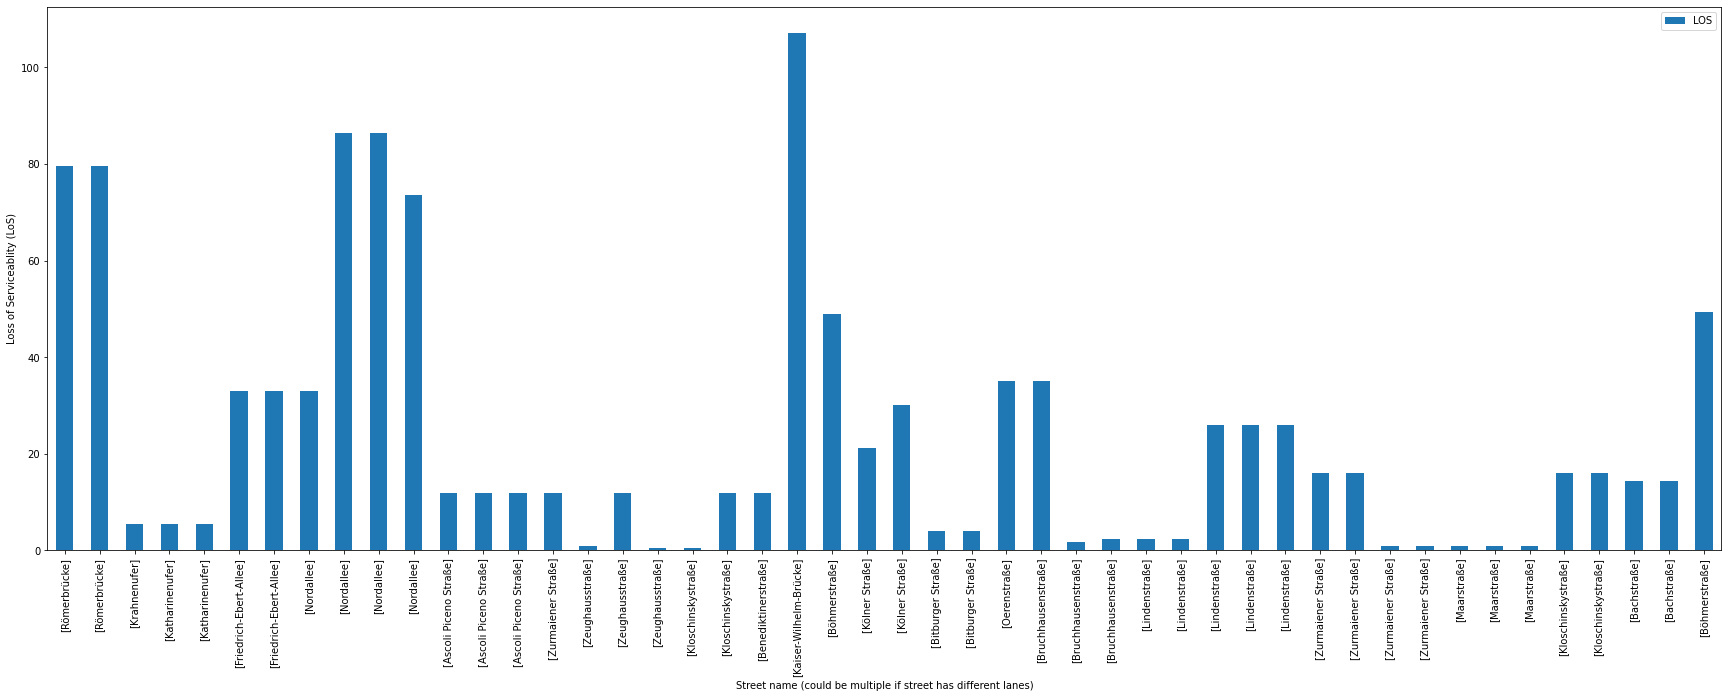

In [42]:

ax = los_df.plot.bar(x='name', y='LOS',figsize = [30,10])
plot.xlabel('Street name (could be multiple if street has different lanes)')
plot.ylabel('Loss of Serviceablity (LoS)')
plot.show(block=True)

In [47]:
los_df['name']=los_df['name'].astype(str)
los_df['affected_path']=los_df['affected_path'].astype(int)
los_df['time_difference']=los_df['time_difference'].astype(int)
los_df['LOS']=los_df['LOS'].astype(float)

In [59]:
final_df = los_df
final_df = final_df.sort_values(by = ['LOS'], ascending= False)
final_df
most_los = final_df.head(10)
less_los = final_df.tail(10)

In [65]:
final_df

u           v                                               name  \
21    78273822    31942123  5    Kaiser-Wilhelm-Brücke\nName: name, dtype:...   
8   2897253810  3889178192         66    Nordallee\nName: name, dtype: object   
9   3889178192   247373153         72    Nordallee\nName: name, dtype: object   
0   7741552929  9265904903        1    Römerbrücke\nName: name, dtype: object   
1   9265904903    20834070        3    Römerbrücke\nName: name, dtype: object   
10   247373153    20833912         45    Nordallee\nName: name, dtype: object   
47  9051264525  3258357805     155    Böhmerstraße\nName: name, dtype: object   
22  3258357818  3258357826     154    Böhmerstraße\nName: name, dtype: object   
27   344115654   344114270       52    Oerenstraße\nName: name, dtype: object   
28   344114270   247367976  51    Bruchhausenstraße\nName: name, dtype: ob...   
6    344111833    20833915  50    Friedrich-Ebert-Allee\nName: name, dtype...   
7     20833915  2897253810          8    Nordallee\nName: name, dtype: object   
5   1651827294   344111833  62    Friedrich-Ebert-Allee\nName: name, dtype...   
24   292256497   247384491    165    Kölner Straße\nName: name, dtype: object   
35    20833916  3310626162       9    Lindenstraße\nName: name, dtype: object   
34   246824042    20833916      39    Lindenstraße\nName: name, dtype: object   
33   247367269   246824042      41    Lindenstraße\nName: name, dtype: object   
23   292256500   292256497    166    Kölner Straße\nName: name, dtype: object   
44   246828507  4060225101  83    Kloschinskystraße\nName: name, dtype: ob...   
43  3702183950   246828507  114    Kloschinskystraße\nName: name, dtype: o...   
37   295985903   246824016  48    Zurmaiener Straße\nName: name, dtype: ob...   
36  3310626162   295985903  68    Zurmaiener Straße\nName: name, dtype: ob...   
46  9513937760  9513937746       147    Bachstraße\nName: name, dtype: object   
45  4060225101  9513937760       126    Bachstraße\nName: name, dtype: object   
16  3255219365   246827875   107    Zeughausstraße\nName: name, dtype: object   
20  3702183957  9513937746  120    Benediktinerstraße\nName: name, dtype: ...   
11    60366894    89989804  12    Ascoli Piceno Straße\nName: name, dtype:...   
13  1622444428  1561307571  61    Ascoli Piceno Straße\nName: name, dtype:...   
14  1623976380  3254826012  99    Zurmaiener Straße\nName: name, dtype: ob...   
12    89989804  1622444428  13    Ascoli Piceno Straße\nName: name, dtype:...   
19  3702183953  3702183957  115    Kloschinskystraße\nName: name, dtype: o...   
2   3258357802  3258357818      151    Krahnenufer\nName: name, dtype: object   
4   3258357805  9051264526   152    Katharinenufer\nName: name, dtype: object   
3   3258357818  3258357805   153    Katharinenufer\nName: name, dtype: object   
26   247384490   259692842  159    Bitburger Straße\nName: name, dtype: ob...   
25   247384491   247384490  160    Bitburger Straße\nName: name, dtype: ob...   
32  3307821765   247367269      67    Lindenstraße\nName: name, dtype: object   
31    20833915  3307821765       7    Lindenstraße\nName: name, dtype: object   
30   247367976    20833915  43    Bruchhausenstraße\nName: name, dtype: ob...   
29   247367976  2897253810  42    Bruchhausenstraße\nName: name, dtype: ob...   
38   246824016   246824017  17    Zurmaiener Straße\nName: name, dtype: ob...   
39   246824017   246824018  19    Zurmaiener Straße\nName: name, dtype: ob...   
40   246824018   246824024        21    Maarstraße\nName: name, dtype: object   
41   246824024   246824025        27    Maarstraße\nName: name, dtype: object   
42   246824025   246824026        29    Maarstraße\nName: name, dtype: object   
15  3254826012  3255219365   101    Zeughausstraße\nName: name, dtype: object   
17   246827875   281525990    80    Zeughausstraße\nName: name, dtype: object   
18   281525990  3702183953  92    Kloschinskystraße\nName: name, dtype: ob...   

    affected_path  time_difference         

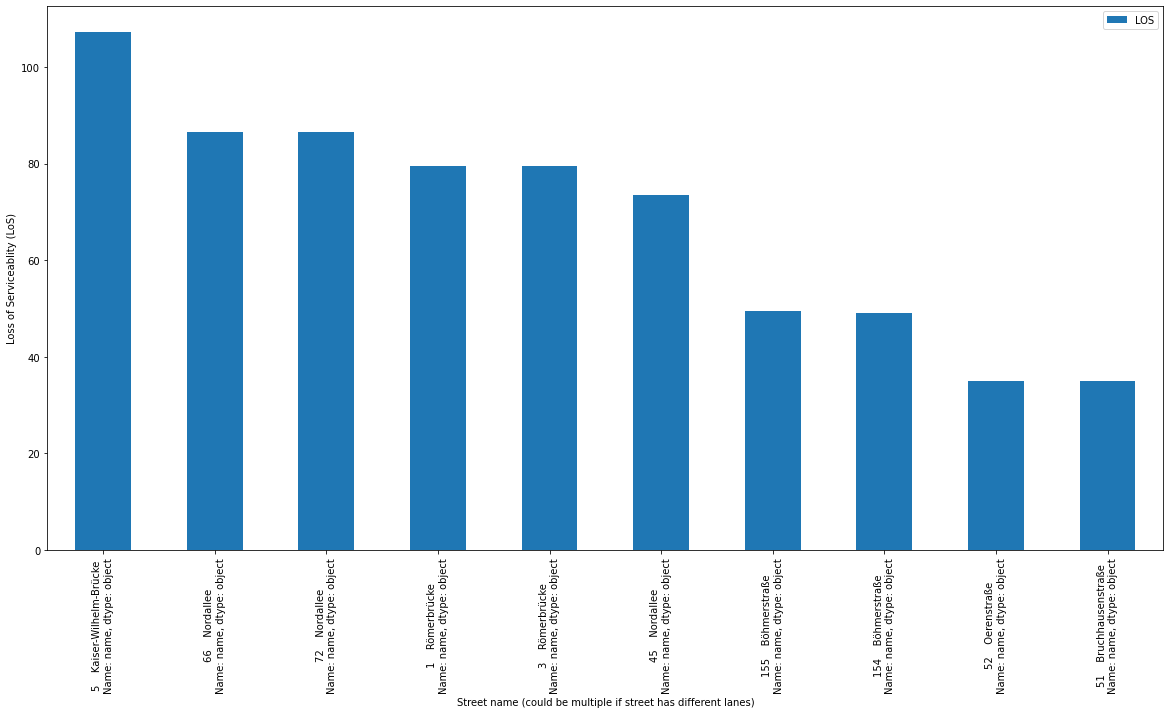

In [62]:
ax = most_los.plot.bar(x='name', y='LOS',figsize = [20,10])
plot.xlabel('Street name (could be multiple if street has different lanes)')
plot.ylabel('Loss of Serviceablity (LoS)')
plot.show(block=True)

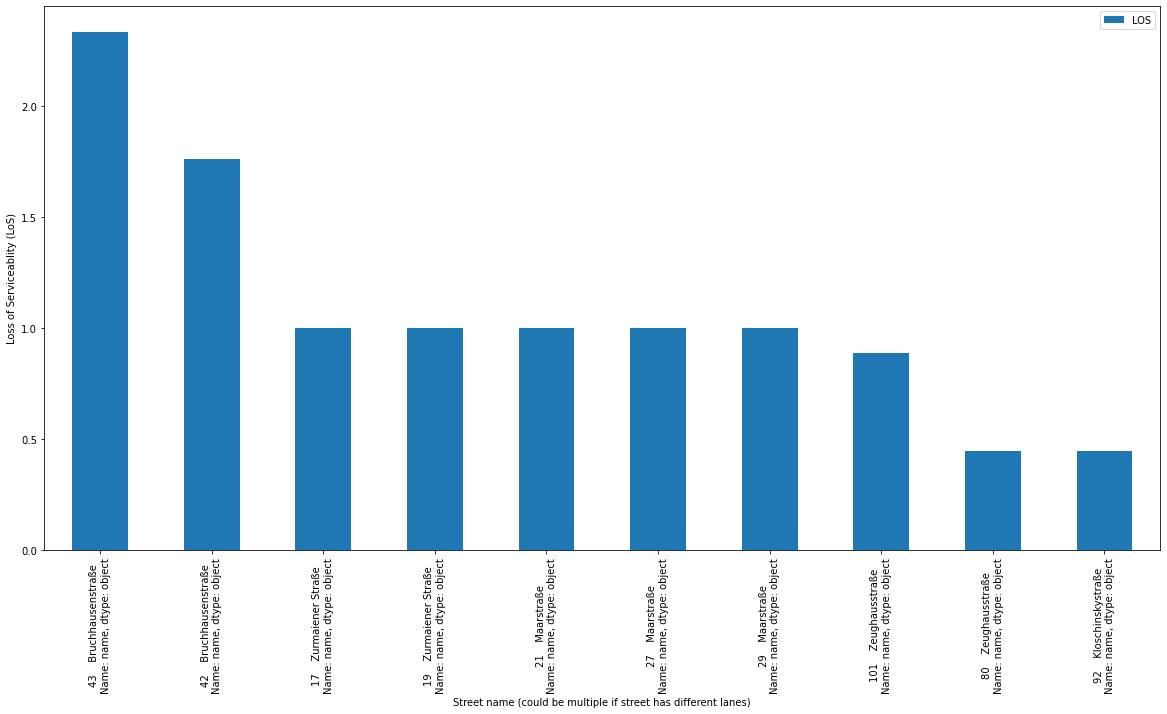

In [64]:
ax = less_los.plot.bar(x='name', y='LOS',figsize = [20,10])
plot.xlabel('Street name (could be multiple if street has different lanes)')
plot.ylabel('Loss of Serviceablity (LoS)')
plot.show(block=True)